# DTSA 5509 Final Project

**Project Topic**

This project uses data from the World Health Organization to model Life Expectancy using demographic factors from populations around the world. First we will load the data and the necessary libaries and then perform exploratory data analysis to understand our features and prepare the data for modeling. Then we will perform supervised machine learning and fit a regression model using backward elimination and evaluate the final model's performance.

**Project Goal**

The goal of this project is to try and understand what demographic factors have an an impact on life expectancy around the world and see if we can create a model to predict this. The dataset includes a mixture of medical information on the population, as well as financial information on the country. I am interested to see which of those types of factors has a bigger impact on predicting life expectancy.

### 1. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set pandas dataframe column limit
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

# set seaborn style
sns.set_style("whitegrid")

### 2. Load Data

**Data Source**

https://www.kaggle.com/api/v1/datasets/download/kumarajarshi/life-expectancy-who

**Data Description**

This dataset is from the Global Health Observatory (GHO) data repository under the World Health Organization and includes data related to life expectancy and health factors from 193 counteries collected over 15 years from 2000-2015. The dataset contains 2938 records with 22 variables, including 21 features and 1 target variable.

**Variables**

| Num | Name                        | Type        | Description                                                                                            |
| :-: | ------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------ |
|  1  | Country                         | Categorical | Country                                                                                                |
|  2  | Year                            | Integer     | Year                                                                                                   |
|  3  | Status                          | Categorical | Developed or Developing status                                                                         |
|  4  | Life Expectancy                 | Numeric     | Life Expectancy in age                                                                                 |
|  5  | Adult Mortality                 | Numeric     | Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) |
|  6  | Infant Deaths                   | Integer     | Number of Infant Deaths per 1000 population                                                            |
|  7  | Alcolol                         | Numeric     | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                             |
|  8  | Percentage Expenditure          | Numeric     | Expenditure on health as a percentage of Gross Domestic Product per capita(%)                          |
|  9  | Hepatitis B                     | Numeric     | Hepatitis B (HepB) immunization coverage among 1-year-olds (%)                                         |
| 10  | Measles                         | Integer     | Measles - number of reported cases per 1000 population                                                 |
| 11  | BMI                             | Numeric     | Average Body Mass Index of entire population                                                           |
| 12  | Under Five Deaths               | Integer     | Number of under-five deaths per 1000 population                                                        |
| 13  | Polio                           | Numeric     | Polio (Pol3) immunization coverage among 1-year-olds (%)                                               |
| 14  | Total Expenditure               | Numeric     | General government expenditure on health as a percentage of total government expenditure (%)           |
| 15  | Diphtheria                      | Numeric     | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)             |
| 16  | HIV/AIDS                        | Numeric     | Deaths per 1 000 live births HIV/AIDS (0-4 years)                                                      |
| 17  | GDP                             | Numeric     | Gross Domestic Product per capita (in USD)                                                             |
| 18  | Population                      | Numeric     | Population of the country                                                                              |
| 19  | Thinness 1-19 yrs               | Numeric     | Prevalence of thinness among children and adolescents for Age 10 to 19 (% )                            |
| 20  | Thinness 5-9 yrs                | Numeric     | Prevalence of thinness among children for Age 5 to 9(%)                                                |
| 21  | Income Composition of Resources | Numeric     | Human Development Index in terms of income composition of resources (index ranging from 0 to 1)        |
| 22  | Schooling                       | Numeric     | Number of years of Schooling (years)                                                  |

In [2]:
# load the dataset and preview the first 5 rows
df = pd.read_csv('data.csv', delimiter=",")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 3. Data Exploration

Next we will perform exploratory data analysis to inspect our dataset, cleanup the column names, and look for missing values.

In [3]:
# check original shape of the dataset
display(df.shape)


(2938, 22)

Here we can see the variable names in the dataset, their types, and the count of non null records.

In [4]:
# check dataset info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

Here we list the column names and can see there are extra white spaces and inconsistencies with capitalization.

In [5]:
# print column names
display(df.columns.tolist())

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Here we use a regex statement to clean up the column names using lowercase characters and replaces white spaces and special characters with underscores.

In [6]:
# cleanup column names
df.columns = [
    re.sub(r'[\s\-]+', '_', re.sub(r'[^\w\s]', '', col.strip().lower())) 
    for col in df.columns
]

# print columns again after cleaning column names
display(df.columns.tolist())

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'underfive_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hivaids',
 'gdp',
 'population',
 'thinness_119_years',
 'thinness_59_years',
 'income_composition_of_resources',
 'schooling']

Next we check for the null counts by column and can see there are several with missing values including 10 records that are missing the target variable life_expectancy.

In [7]:
# check for nulls
display(df.isnull().sum())

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
underfive_deaths                     0
polio                               19
total_expenditure                  226
diphtheria                          19
hivaids                              0
gdp                                448
population                         652
thinness_119_years                  34
thinness_59_years                   34
income_composition_of_resources    167
schooling                          163
dtype: int64

Next we check for the null percentages by column to understand what proportion of data is missing.

In [8]:
# missing value percentages
round(df.isnull().mean() * 100, 2)

country                             0.00
year                                0.00
status                              0.00
life_expectancy                     0.34
adult_mortality                     0.34
infant_deaths                       0.00
alcohol                             6.60
percentage_expenditure              0.00
hepatitis_b                        18.82
measles                             0.00
bmi                                 1.16
underfive_deaths                    0.00
polio                               0.65
total_expenditure                   7.69
diphtheria                          0.65
hivaids                             0.00
gdp                                15.25
population                         22.19
thinness_119_years                  1.16
thinness_59_years                   1.16
income_composition_of_resources     5.68
schooling                           5.55
dtype: float64

Here we can display some summary statistics on the numeric columns before we address any missing values or perform any transformations.

In [9]:
# describe the dataset
display(df.describe())

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Next let's inspect some sample records to see actual values in the dataset.

In [10]:
# display the dataframe
display(df)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [11]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates in the dataset')

There are 0 duplicates in the dataset



### 4. Data Cleaning

Next we will clean the data and prepare it to train a machine learning model by addressing missing values, dropping unnecessary variables, and converting data types.

First we will drop records that are missing the target variable since we don't have a label to train our model on.

In [12]:
# drop life_expectancy with missing values
df = df.dropna(subset=['life_expectancy'])

Then we will drop two categorical variables that will not be used to train the model.

In [13]:
# drop the country column
df = df.drop(columns=['country'])

# drop the year column
df = df.drop(columns=['year'])

Here we will fill in the missing values of the continuous features using the median since the row counts are relatively large and the median is a good estimator.

In [14]:
# impute continuous features with median
features = [col for col in df.columns if col not in ['country', 'year', 'status', 'life_expectancy']]
medians = {feature: df[feature].median() for feature in features}
print(medians)
for feature in features:
    df[feature] = df[feature].fillna(medians[feature])

# missing value percentages
round(df.isnull().mean() * 100, 2)

{'adult_mortality': 144.0, 'infant_deaths': 3.0, 'alcohol': 3.77, 'percentage_expenditure': 65.61145482, 'hepatitis_b': 92.0, 'measles': 17.0, 'bmi': 43.349999999999994, 'underfive_deaths': 4.0, 'polio': 93.0, 'total_expenditure': 5.75, 'diphtheria': 93.0, 'hivaids': 0.1, 'gdp': 1764.97387, 'population': 1391756.5, 'thinness_119_years': 3.3, 'thinness_59_years': 3.4, 'income_composition_of_resources': 0.677, 'schooling': 12.3}


status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
underfive_deaths                   0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hivaids                            0.0
gdp                                0.0
population                         0.0
thinness_119_years                 0.0
thinness_59_years                  0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

Here we convert an ordinal categorical feature using label encoding since there is order to this variable.

In [15]:
# convert ordinal categorical feature using label encoding
df['status'] = df['status'].map({'Developing': 0, 'Developed': 1})

display(df.describe())
display(df.head())

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,0.174863,69.224932,164.796448,30.407445,4.559167,740.321185,83.045765,2427.855874,38.291291,42.179303,82.616120,5.916257,82.390710,1.747712,6627.389707,1.026315e+07,4.833675,4.865232,0.630128,12.016052
std,0.379915,9.523867,124.292079,118.114450,3.920534,1990.930605,22.942047,11485.970937,19.857308,160.700547,23.355634,2.385963,23.645132,5.085542,13316.392534,5.411179e+07,4.399553,4.487535,0.205440,3.254407
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,0.000000,63.100000,74.000000,0.000000,1.107500,4.853964,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,0.000000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,0.000000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4793.630903,4.592777e+06,7.100000,7.200000,0.773000,14.100000
max,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 5. Data Visualization

Next we will display data visualizations for our features to visualize the distributions. We can see several variables are highly skewed by outliers on one tail or the other.

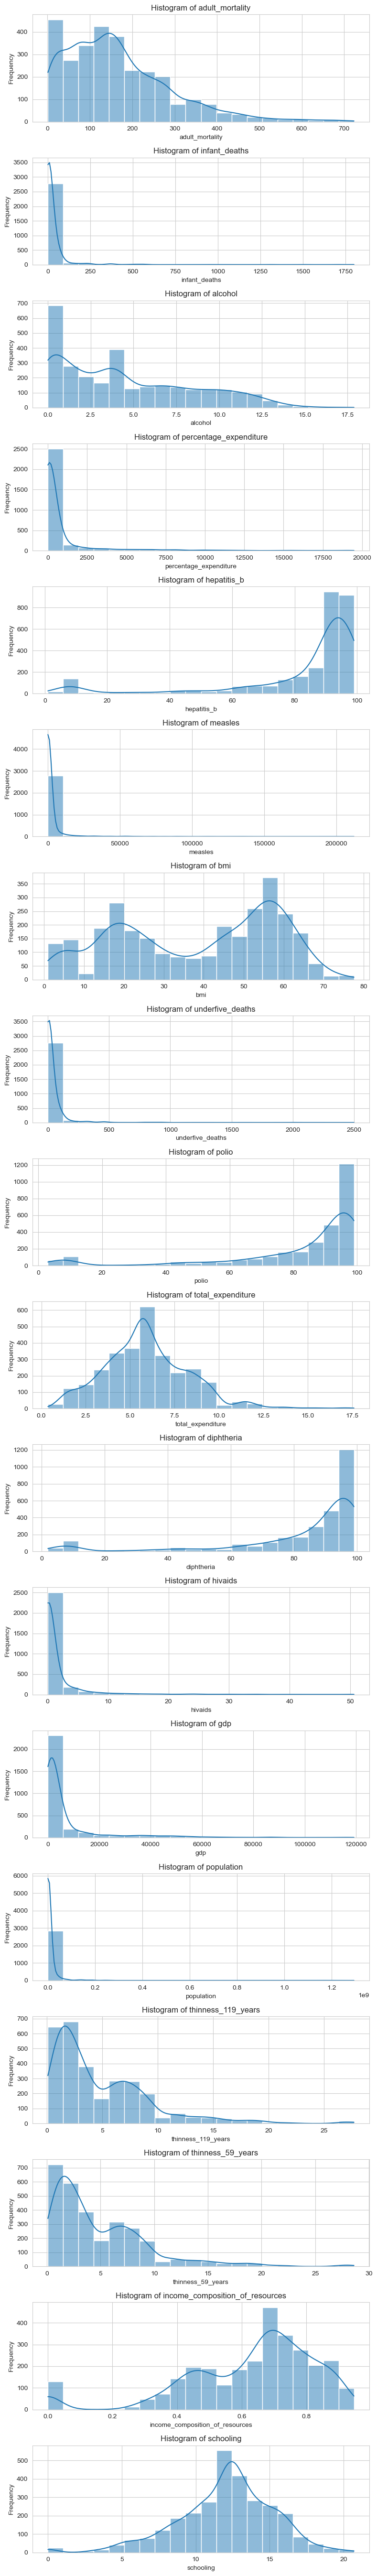

In [16]:
# Plot histograms for all numerical columns
df_numeric = df[features]
num_cols = len(df_numeric.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols * 3))
for i, col in enumerate(df_numeric.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we visualize the target variable to understand the distribution and can see it follows a fairly normal distribution with some left skew.

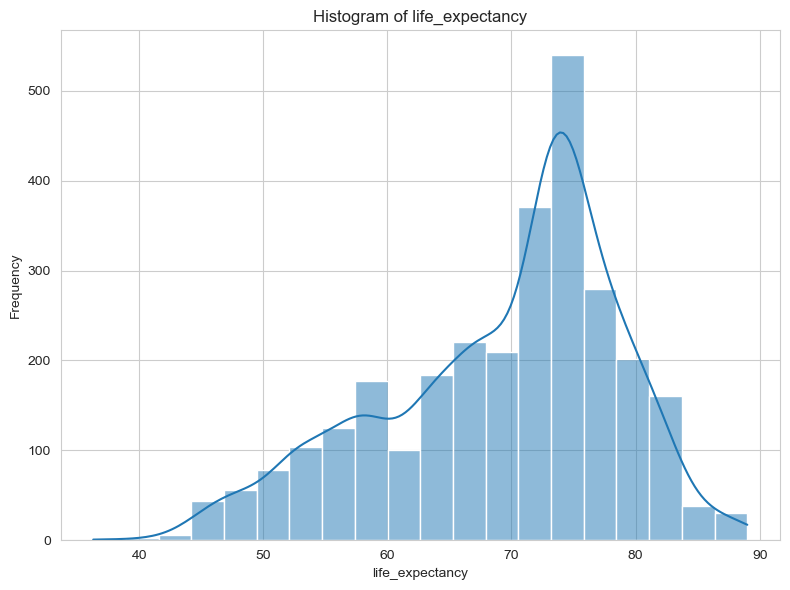

In [17]:
# plot histogram for the 'life_expectancy' column
plt.figure(figsize=(8, 6))
sns.histplot(df['life_expectancy'], kde=True, bins=20)
plt.title('Histogram of life_expectancy')
plt.xlabel('life_expectancy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we visualize the distribution of an ordinal categorical feature and can see it is highly imbalanced in favor of the developing status.

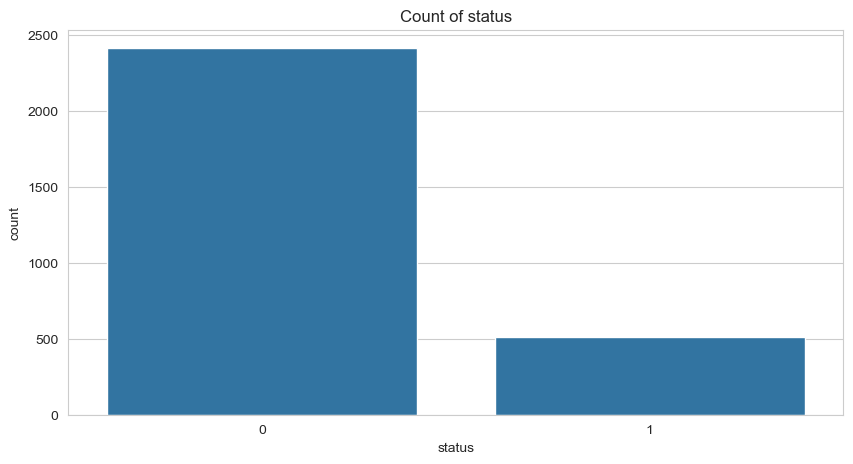

In [18]:
# plot categorical features
df_categorical = df[['status']]
num_cols = len(df_categorical.columns)

plt.figure(figsize=(10, 5))
for i, col in enumerate(df_categorical.columns):
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.show()

Here we produce a correlation matrix and visualize using a heat map where red colors indicate a strong positive correlation and blue indicate a strong negative correlation between features.

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling
status,1.000000,0.482136,-0.315284,-0.112708,0.579723,0.454032,0.127101,-0.077320,0.313314,-0.115661,0.219221,0.294290,0.215868,-0.149178,0.445682,-0.037888,-0.367643,-0.366138,0.461478,0.494753
life_expectancy,0.482136,1.000000,-0.696359,-0.196557,0.390674,0.381864,0.171255,-0.157586,0.558888,-0.222529,0.459458,0.209588,0.473268,-0.556556,0.430991,-0.028842,-0.467859,-0.462645,0.688591,0.717314
adult_mortality,-0.315284,-0.696359,1.000000,0.078756,-0.191066,-0.242860,-0.123971,0.031176,-0.380592,0.094146,-0.270597,-0.112176,-0.270877,0.523821,-0.281715,-0.005392,0.296076,0.301855,-0.436268,-0.435926
infant_deaths,-0.112708,-0.196557,0.078756,1.000000,-0.113919,-0.085906,-0.168393,0.501038,-0.226969,0.996628,-0.171273,-0.126471,-0.175747,0.024955,-0.103175,0.551608,0.464762,0.470469,-0.141329,-0.192421
alcohol,0.579723,0.390674,-0.191066,-0.113919,1.000000,0.344228,0.089540,-0.050490,0.321196,-0.110801,0.212082,0.302242,0.212766,-0.047314,0.312735,-0.027387,-0.416992,-0.406089,0.420009,0.499675
percentage_expenditure,0.454032,0.381864,-0.242860,-0.085906,0.344228,1.000000,0.039805,-0.056831,0.229920,-0.088152,0.146546,0.177355,0.142897,-0.098230,0.901803,-0.017070,-0.250729,-0.252366,0.375234,0.387937
hepatitis_b,0.127101,0.171255,-0.123971,-0.168393,0.089540,0.039805,1.000000,-0.073544,0.116743,-0.171539,0.362537,0.066908,0.447373,-0.086197,0.076936,-0.125713,-0.099491,-0.102505,0.118166,0.134263
measles,-0.077320,-0.157586,0.031176,0.501038,-0.050490,-0.056831,-0.073544,1.000000,-0.176132,0.507718,-0.136966,-0.104294,-0.142680,0.030673,-0.069531,0.237096,0.224606,0.220869,-0.110884,-0.121817
bmi,0.313314,0.558888,-0.380592,-0.226969,0.321196,0.229920,0.116743,-0.176132,1.000000,-0.237262,0.284278,0.227095,0.283207,-0.243364,0.277118,-0.069296,-0.531240,-0.538194,0.473592,0.510756
underfive_deaths,-0.115661,-0.222529,0.094146,0.996628,-0.110801,-0.088152,-0.171539,0.507718,-0.237262,1.000000,-0.189284,-0.128161,-0.196224,0.037783,-0.106446,0.539198,0.466640,0.471190,-0.159022,-0.207801


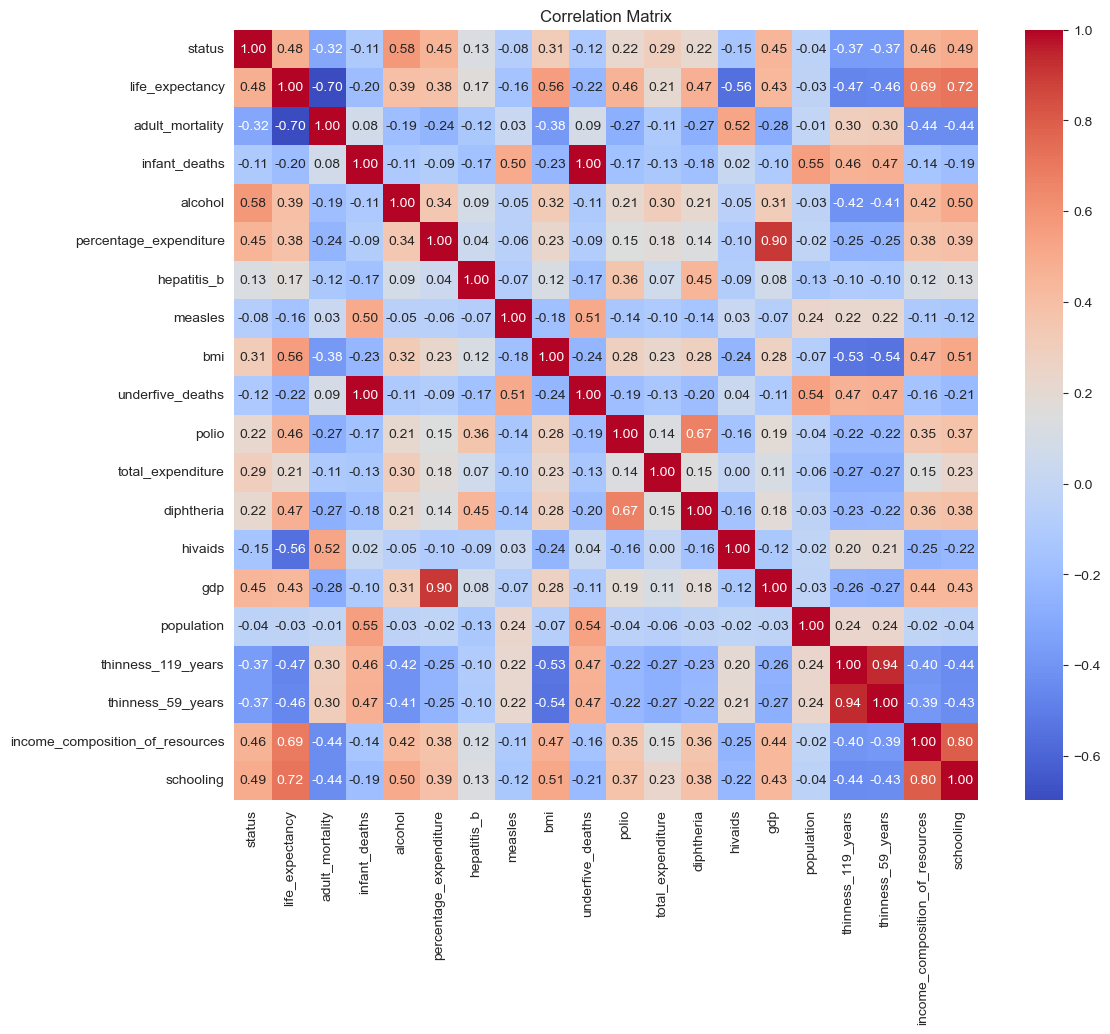

In [19]:
# correlation
corr = df.corr()
display(corr)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 6. Data Scaling

Next we will scale our features and our target variable using a standard scaler so that we normalize the feature importance in the model and can make easy feature comparison.

In [20]:
# standardize the independent variables
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(df.drop('life_expectancy', axis=1)), columns=df.drop('life_expectancy', axis=1).columns)

# standardize the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(df[['life_expectancy']])  # Must keep y as 2D array

# create a dataframe with the scaled values
df_scaled = pd.concat([X_scaled, pd.DataFrame(y_scaled, columns=['life_expectancy'])], axis=1)

# compute covariance matrix
cov_matrix = df_scaled.cov()
display(cov_matrix)

,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,underfive_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thinness_119_years,thinness_59_years,income_composition_of_resources,schooling,life_expectancy
status,1.000342,-0.315392,-0.112747,0.579921,0.454187,0.127144,-0.077346,0.313421,-0.115701,0.219296,0.294391,0.215942,-0.149229,0.445834,-0.037901,-0.367769,-0.366263,0.461636,0.494922,0.482301
adult_mortality,-0.315392,1.000342,0.078783,-0.191131,-0.242943,-0.124014,0.031187,-0.380722,0.094178,-0.270690,-0.112214,-0.270970,0.523999,-0.281811,-0.005394,0.296177,0.301958,-0.436417,-0.436075,-0.696597
infant_deaths,-0.112747,0.078783,1.000342,-0.113958,-0.085935,-0.168450,0.501209,-0.227047,0.996969,-0.171331,-0.126514,-0.175807,0.024963,-0.103210,0.551796,0.464921,0.470629,-0.141377,-0.192487,-0.196624
alcohol,0.579921,-0.191131,-0.113958,1.000342,0.344346,0.089571,-0.050508,0.321306,-0.110839,0.212154,0.302345,0.212839,-0.047330,0.312842,-0.027397,-0.417134,-0.406228,0.420153,0.499845,0.390807
percentage_expenditure,0.454187,-0.242943,-0.085935,0.344346,1.000342,0.039818,-0.056850,0.229999,-0.088182,0.146596,0.177415,0.142946,-0.098263,0.902111,-0.017076,-0.250814,-0.252452,0.375362,0.388069,0.381994
hepatitis_b,0.127144,-0.124014,-0.168450,0.089571,0.039818,1.000342,-0.073570,0.116783,-0.171598,0.362661,0.066931,0.447525,-0.086227,0.076962,-0.125756,-0.099525,-0.102540,0.118206,0.134308,0.171314
measles,-0.077346,0.031187,0.501209,-0.050508,-0.056850,-0.073570,1.000342,-0.176192,0.507891,-0.137012,-0.104329,-0.142728,0.030684,-0.069555,0.237177,0.224682,0.220944,-0.110921,-0.121859,-0.157640
bmi,0.313421,-0.380722,-0.227047,0.321306,0.229999,0.116783,-0.176192,1.000342,-0.237343,0.284375,0.227173,0.283304,-0.243447,0.277213,-0.069319,-0.531421,-0.538378,0.473754,0.510930,0.559079
underfive_deaths,-0.115701,0.094178,0.996969,-0.110839,-0.088182,-0.171598,0.507891,-0.237343,1.000342,-0.189348,-0.128205,-0.196292,0.037796,-0.106483,0.539382,0.466799,0.471351,-0.159076,-0.207872,-0.222605
polio,0.219296,-0.270690,-0.171331,0.212154,0.146596,0.362661,-0.137012,0.284375,-0.189348,1.000342,0.137512,0.672787,-0.159539,0.190647,-0.044935,-0.219439,-0.220313,0.345888,0.374390,0.459615


### 7. Multicollinearity

Here we check for multicollinearity using VIF and drop any features with VIF > 10 which indicates high multicollinearity. We can see that once infant_deaths is removed from the dataset, the remaining features all have reasonably low VIF and each provides novel information to the model.

In [21]:
# function to compute vif to detect multicollinearity
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# function to iteratively drop features with VIF > 10
def drop_high_vif_features(df, threshold=10):
    while True:
        vif_data = compute_vif(df)
        max_vif = vif_data["VIF"].max()
        
        # stop when all VIFs are below the threshold
        if max_vif <= threshold:
            break  

        # find the feature with the highest VIF
        feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping '{feature_to_drop}' with VIF: {max_vif:.2f}")

        # drop the feature
        df = df.drop(columns=[feature_to_drop])

    # return the cleaned dataframe and the final VIF report
    return df, compute_vif(df)  

# run the VIF check and feature elimination
df_scaled_clean, final_vif = drop_high_vif_features(df_scaled)

# print final VIF report
print("\nFinal VIF Report (After Removing High VIF Features):")
print(final_vif)

Dropping 'infant_deaths' with VIF: 185.68

Final VIF Report (After Removing High VIF Features):
                            Feature       VIF
0                            status  1.900064
1                   adult_mortality  2.105826
2                           alcohol  1.822145
3            percentage_expenditure  5.771113
4                       hepatitis_b  1.313964
5                           measles  1.380624
6                               bmi  1.774252
7                  underfive_deaths  2.204068
8                             polio  1.957005
9                 total_expenditure  1.212523
10                       diphtheria  2.192342
11                          hivaids  1.769036
12                              gdp  5.987940
13                       population  1.445739
14               thinness_119_years  8.755289
15                thinness_59_years  8.823189
16  income_composition_of_resources  3.113466
17                        schooling  3.694912
18                  life_expec

### 8. Train-Test Split

Here we split the data into train and test sets using an 80/20 split using the scaled and cleaned data frame.

In [22]:
# split the dataset into train and test sets
X = df_scaled_clean.drop('life_expectancy', axis=1)
y = df_scaled_clean['life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2342, 18)
(2342,)
(586, 18)
(586,)


### 9. Model Training

Here we fit a linear regression model on the training data.

In [23]:
# fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 10. Full Model Summary

Next we will produce a model summary to inspect the features used in the model to understand their feature importance using the coefficients, p-values, and t-values. We can see that most of the variables have low p-values < 0.05 which indicates statistical significance. However there are several variables that have high p-values and this suggests they are not needed in the model.

In [24]:
def model_summary(model, X_train, y_train):
    # Calculate additional statistics
    X_train_with_intercept = np.column_stack((np.ones(X_train.shape[0]), X_train))
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X_train)

    # calculate residuals
    residuals = y_train - predictions

    # calculate standard errors
    sse = np.sum(residuals**2, axis=0) / float(X_train_with_intercept.shape[0] - X_train_with_intercept.shape[1])
    se = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X_train_with_intercept.T, X_train_with_intercept))))

    # calculate t-values and p-values
    t_values = params / se
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (X_train_with_intercept.shape[0] - X_train_with_intercept.shape[1]))) for i in t_values]

    # create a summary table
    # Set display options to avoid scientific notation
    pd.set_option('display.float_format', '{:.6f}'.format)

    summary_df = pd.DataFrame({
        'Feature': ['Intercept'] + list(X_train.columns),
        'Coefficient': params,
        'Standard Error': se,
        't-value': t_values,
        'p-value': p_values
    })

    return summary_df

summary_df = model_summary(model, X_train, y_train)
display(summary_df)

,Feature,Coefficient,Standard Error,t-value,p-value
0,Intercept,0.004887,0.009007,0.542594,0.587462
1,status,0.065725,0.012097,5.433032,0.000000
2,adult_mortality,-0.264755,0.011843,-22.355357,0.000000
3,alcohol,0.000946,0.011941,0.079193,0.936886
4,percentage_expenditure,0.019371,0.021285,0.910055,0.362888
5,hepatitis_b,-0.040842,0.010358,-3.943074,0.000083
6,measles,-0.027592,0.010466,-2.636353,0.008436
7,bmi,0.092457,0.011791,7.841498,0.000000
8,underfive_deaths,-0.030619,0.012871,-2.378978,0.017441
9,polio,0.078638,0.012457,6.312634,0.000000


### 11. Backward Elimination

Next we perform backward elimination to remove features one at a time until all remaining features have low p-values. We can see there are 6 features dropped from the model until the remaining 12 features are all statistically significant.

In [25]:
def backward_elimination(model, X_train, y_train, X_test, y_test, alpha=0.05):
    while True:
        model.fit(X_train, y_train)
        summary_df = model_summary(model, X_train, y_train)  
        
        # exclude the intercept from dropping
        sorted_df = summary_df[summary_df["Feature"] != "Intercept"].sort_values(by="p-value", ascending=False)

        # get the feature with the highest p-value
        feature = sorted_df.iloc[0]['Feature']
        max_p = sorted_df['p-value'].max()

        # ff highest p-value > alpha, drop feature
        if max_p > alpha:
            print(f"Dropping feature '{feature}' with p-value {max_p:.6f}")
            X_train = X_train.drop(columns=feature)
            X_test = X_test.drop(columns=feature)
        else:
             # stop when all remaining features are significant
            break 

    return model, summary_df, X_train, y_train, X_test, y_test

# backward elimination of features with p-value > 0.05
alpha = 0.05
model, summary_df, X_train, y_train, X_test, y_test = backward_elimination(model, X_train, y_train, X_test, y_test, alpha)
display(summary_df)

Dropping feature 'alcohol' with p-value 0.936886
Dropping feature 'percentage_expenditure' with p-value 0.356093
Dropping feature 'thinness_59_years' with p-value 0.242864
Dropping feature 'total_expenditure' with p-value 0.217664
Dropping feature 'population' with p-value 0.064244
Dropping feature 'underfive_deaths' with p-value 0.121087


,Feature,Coefficient,Standard Error,t-value,p-value
0,Intercept,0.004708,0.009012,0.522405,0.601438
1,status,0.067587,0.010993,6.147957,0.000000
2,adult_mortality,-0.264863,0.011824,-22.401123,0.000000
3,hepatitis_b,-0.040890,0.010222,-4.000128,0.000065
4,measles,-0.036350,0.009283,-3.915731,0.000093
5,bmi,0.090964,0.011671,7.793984,0.000000
6,polio,0.078877,0.012459,6.331033,0.000000
7,diphtheria,0.120371,0.013191,9.124939,0.000000
8,hivaids,-0.251503,0.010435,-24.102960,0.000000
9,gdp,0.060789,0.010525,5.775613,0.000000


### 12. Model Evaluation

Next we produce the final model summary to see the impact our features have on the target variable. Then we use the test set to make predictions using the final model and evaluate the models performance and measure the error. 

In [26]:
def model_summary_evaluation(model, X_train, y_train, X_test, y_test):
    # fit model
    model.fit(X_train, y_train)
    
    # predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # compute residuals
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    # compute residuals summary (training)
    residuals_summary = {
        "Min": np.min(residuals_train),
        "1Q": np.percentile(residuals_train, 25),
        "Median": np.median(residuals_train),
        "3Q": np.percentile(residuals_train, 75),
        "Max": np.max(residuals_train)
    }

    # add intercept to X_train and X_test
    X_train_with_intercept = np.column_stack((np.ones(X_train.shape[0]), X_train))
    X_test_with_intercept = np.column_stack((np.ones(X_test.shape[0]), X_test))

    # get model parameters (intercept and coefficients)
    params = np.append(model.intercept_, model.coef_)

    # compute standard errors
    sse = np.sum(residuals_train**2) / (X_train_with_intercept.shape[0] - X_train_with_intercept.shape[1])
    covariance_matrix = sse * np.linalg.inv(np.dot(X_train_with_intercept.T, X_train_with_intercept))
    standard_errors = np.sqrt(np.diagonal(covariance_matrix))

    # compute t-values and p-values
    t_values = params / standard_errors
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (X_train_with_intercept.shape[0] - X_train_with_intercept.shape[1]))) for i in t_values]

    # compute R^2 and adjusted R^2 (training)
    ss_total_train = np.sum((y_train - np.mean(y_train))**2)
    ss_residual_train = np.sum(residuals_train**2)
    r_squared_train = 1 - (ss_residual_train / ss_total_train)
    adjusted_r_squared_train = 1 - ((ss_residual_train / (X_train.shape[0] - X_train.shape[1] - 1)) / (ss_total_train / (X_train.shape[0] - 1)))

    # compute test set performance
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # compute f-statistic and p-value
    f_statistic = (r_squared_train / (1 - r_squared_train)) * ((X_train.shape[0] - X_train.shape[1] - 1) / X_train.shape[1])
    f_p_value = stats.f.sf(f_statistic, X_train.shape[1], X_train.shape[0] - X_train.shape[1] - 1)

    # compute residual standard error
    residual_std_error_train = np.sqrt(ss_residual_train / (X_train.shape[0] - X_train.shape[1] - 1))

    # significance codes for coefficients
    def significance_code(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        elif p < 0.1:
            return '.'
        else:
            return ' '

    significance = [significance_code(p) for p in p_values]

    # create summary dataframe
    summary_df = pd.DataFrame({
        'Feature': ['Intercept'] + list(X_train.columns),
        'Estimate': params,
        'Std. Error': standard_errors,
        't value': t_values,
        'Pr(>|t|)': p_values,
        'Signif.': significance
    })

    # format display options for cleaner output
    pd.set_option('display.float_format', '{:.6f}'.format)

    # print model summary in R-like format
    print("\nCall:")
    print(f"lm(formula = y ~ {' + '.join(X_train.columns)}, data = training_data)\n")

    print("Residuals (Training Set):")
    print("    Min      1Q  Median      3Q     Max")
    print(f"{residuals_summary['Min']:7.4f} {residuals_summary['1Q']:7.4f} {residuals_summary['Median']:7.4f} {residuals_summary['3Q']:7.4f} {residuals_summary['Max']:7.4f}\n")

    print("Coefficients:")
    print(summary_df.to_string(index=False))

    print("\nResidual standard error:", f"{residual_std_error_train:.3f}", "on", f"{X_train.shape[0] - X_train.shape[1] - 1} degrees of freedom")
    print(f"Multiple R-squared:  {r_squared_train:.4f}, Adjusted R-squared:  {adjusted_r_squared_train:.4f}")
    print(f"F-statistic: {f_statistic:.1f} on {X_train.shape[1]} and {X_train.shape[0] - X_train.shape[1] - 1} DF,  p-value: {f_p_value:.6f}\n")

    print("\nTest Set Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse_test:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
    print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
    print(f"R-squared (R²): {r2_test:.4f}\n")

    return summary_df

summary_df = model_summary_evaluation(model, X_train, y_train, X_test, y_test)


Call:
lm(formula = y ~ status + adult_mortality + hepatitis_b + measles + bmi + polio + diphtheria + hivaids + gdp + thinness_119_years + income_composition_of_resources + schooling, data = training_data)

Residuals (Training Set):
    Min      1Q  Median      3Q     Max
-2.2989 -0.2345 -0.0080  0.2483  1.7951

Coefficients:
                        Feature  Estimate  Std. Error    t value  Pr(>|t|) Signif.
                      Intercept  0.004708    0.009012   0.522405  0.601438        
                         status  0.067587    0.010993   6.147957  0.000000     ***
                adult_mortality -0.264863    0.011824 -22.401123  0.000000     ***
                    hepatitis_b -0.040890    0.010222  -4.000128  0.000065     ***
                        measles -0.036350    0.009283  -3.915731  0.000093     ***
                            bmi  0.090964    0.011671   7.793984  0.000000     ***
                          polio  0.078877    0.012459   6.331033  0.000000     ***
        

Above we can see that each of our features are statistically significant and so is our F-statistic. We can also see the R^2 for the model using the training set is 0.8130 and the R^2 on the test set is 0.8014 which indicates our model is performing well and generalizing to unseen data.

### 13. Feature Importance

Here we inspect the feature importance from the final model and visualize using a bar chart with the features on the y axis and the feature importance on the x axis, with positive values indicating a postive relationship and negative values indicating a negative relationship. We can see schooling has the greatest positive impact and hiv/aids and adult mortality having the highest negative impact.

                        Feature  Coefficient
                      schooling     0.239656
income_composition_of_resources     0.128736
                     diphtheria     0.120371
                            bmi     0.090964
                          polio     0.078877
                         status     0.067587
                            gdp     0.060789
                        measles    -0.036350
             thinness_119_years    -0.037226
                    hepatitis_b    -0.040890
                        hivaids    -0.251503
                adult_mortality    -0.264863


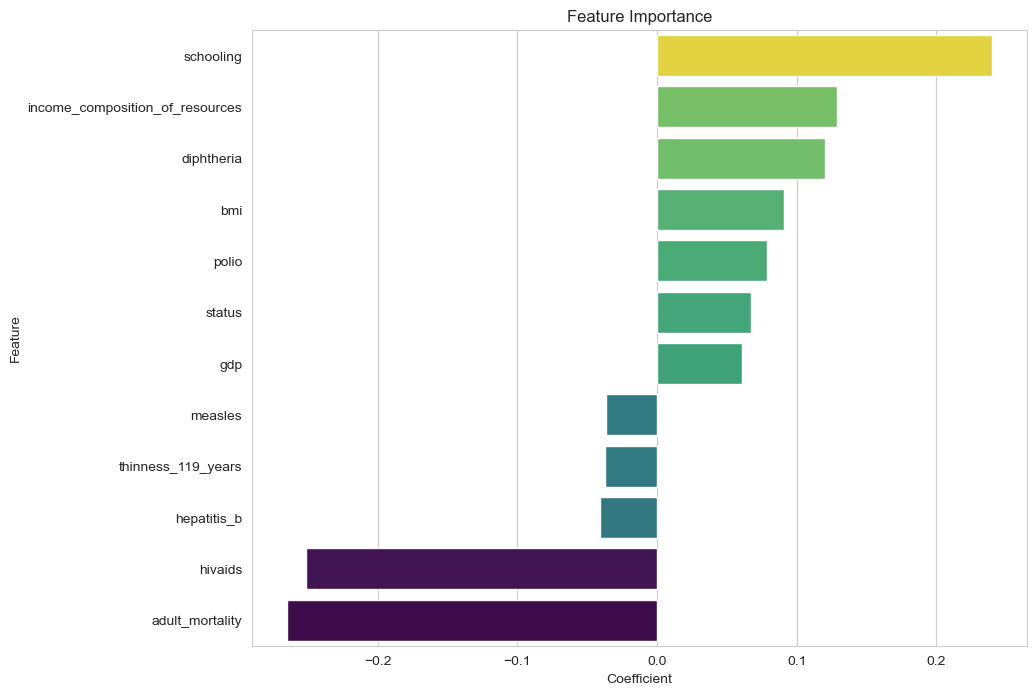

In [27]:
# get the coefficients and feature names
coefficients = model.coef_.flatten()
features = X_train.columns

# create a DataFrame to hold feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# sort the features by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# display the sorted features
print(feature_importance.to_string(index=False))

# plot the feature importance using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, hue='Coefficient', dodge=False, palette='viridis', legend=False)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### 14. Model Predictions

Next we will visualize the model performance by comparing actual vs predicted values, both before and after transforming the target variable back to the original scale to demonstrate this necessity for making predictions.

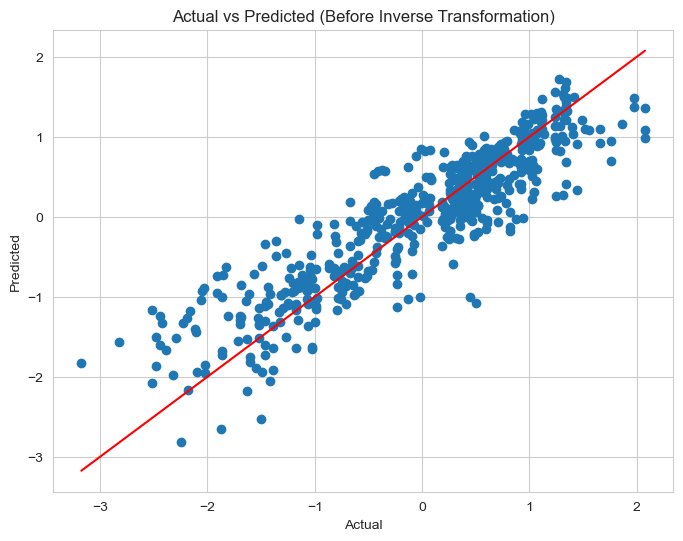

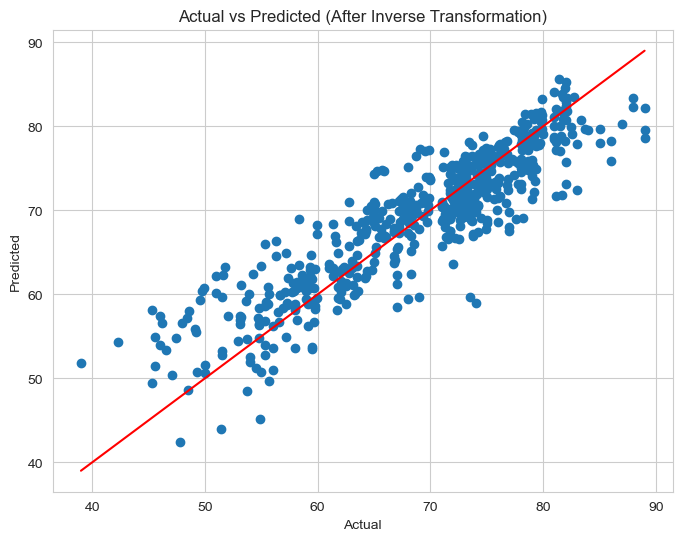

In [28]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# predictions before inverse transformation
y_pred_scaled = model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred_scaled, 'Actual vs Predicted (Before Inverse Transformation)')

# ensure predictions are 2D before inverse transformation
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# inverse transform predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled).flatten()  # Flatten back to 1D

# inverse transform the actual values as well
y_test_actual = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# plot actual vs. predicted values after inverse transformation
plot_actual_vs_predicted(y_test_actual, y_pred, 'Actual vs Predicted (After Inverse Transformation)')

### 15. Conclusion

Overall we can see the linear regession model is performing well in making predictions on life expectancy using the test set as our R^2 metric is 0.8014 which tells us over 80% of the relationships are explained by the model. To get here we had to first explore and clean the data. This invloved dropping any missing values in the target variable as there was no label for us to use and dropped extra features that provided no value in predicting the target variable. Then we filled in the missing values using the sample medians since the data is reasonably large and this is a good estimate for the popluaiton. Next we scaled both the features and the target variable so that our scales were standardized and the features could be comapred for feature importance. Then we looked for correlations and collinearity so that we could remove any features that did not add new information to the model. After the data was cleaned, we created our train and test sets to fit the regression model and producd a model summary using all remaining features. We could see several were not significant since their p-values were large and therefore we proceeded with backward elimination, removing one feature at a time until all features remaining were statistically significant. Once we had our final model we produced the model summary and evaluted the model for making predictions and produced good results with over 80% of the data explained by the model. For next steps I would be interested in trying other types of supervised machine learning models to see if the performance can be improved such as models that can detect non linear relationships.